In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn import linear_model

In [2]:
# Import raw data, inspect head
sales = pd.read_csv('../data/home_data.csv')
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.6+ MB


In [4]:
sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,540088.141905,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,367127.195968,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,75000.000000,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,321950.000000,3.000000,1.750000,1427.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,450000.000000,3.000000,2.250000,1910.000000,7618.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,645000.000000,4.000000,2.500000,2550.000000,10688.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7700000.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
cols = ['zipcode', 'price']
sales_by_zip = sales[cols].groupby('zipcode')
sales_by_zip.mean().sort_values(by= 'price', ascending=False)[:10]

,price
zipcode,
98039,2160606
98004,1355927
98040,1194230
98112,1095499
98102,901258
98109,879623
98105,862825
98006,859684
98119,849448


In [6]:
price_avg = sales[cols].groupby('zipcode').agg({'price': [np.size, np.mean]})
price_avg.sort_values([('price', 'mean')], ascending= False)[:10]

price         
         size     mean
zipcode               
98039      50  2160606
98004     317  1355927
98040     282  1194230
98112     269  1095499
98102     105   901258
98109     109   879623
98105     229   862825
98006     498   859684
98119     184   849448
98005     168   810164

In [7]:
#high_price_zip = price_avg[price_avg.zipcode == '98039']
#high_price_zip

price_avg.columns.values.tolist()

[('price', 'size'), ('price', 'mean')]

In [8]:
sales_mid_size = sales[(sales.sqft_living > 2000) & (sales.sqft_living <= 4000)]
print(len(sales_mid_size))

9118


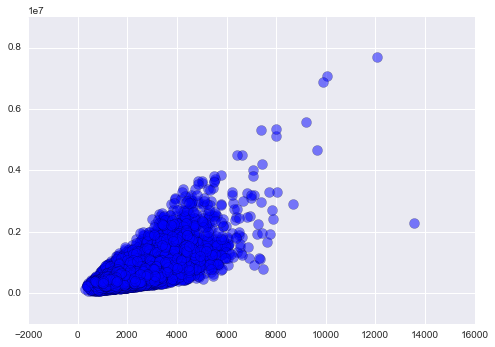

In [9]:
# Create basic Scatter Plot with ALL Data

plt.scatter(x= sales.sqft_living, 
            y= sales.price, 
            s= 100, 
            alpha= 0.5, 
            c= 'blue')

In [10]:
# Divide data into training and test sets
train_data, test_data = train_test_split(sales, test_size= 0.2, random_state= 0)  #random_state==seed

x_train_data = np.matrix(train_data.sqft_living)
#x_train_data
y_train_data = np.matrix(train_data.price)
#y_train_data

In [11]:
regr = linear_model.LinearRegression()
regr.fit(x_train_data, y_train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
regr.coef_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

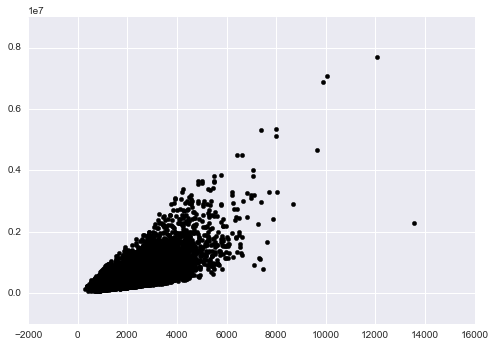

In [13]:
plt.scatter(x_train_data, y_train_data, color='black')
plt.plot(x_train_data, regr.predict(x_train_data), color='blue', linewidth=3)
plt.show()

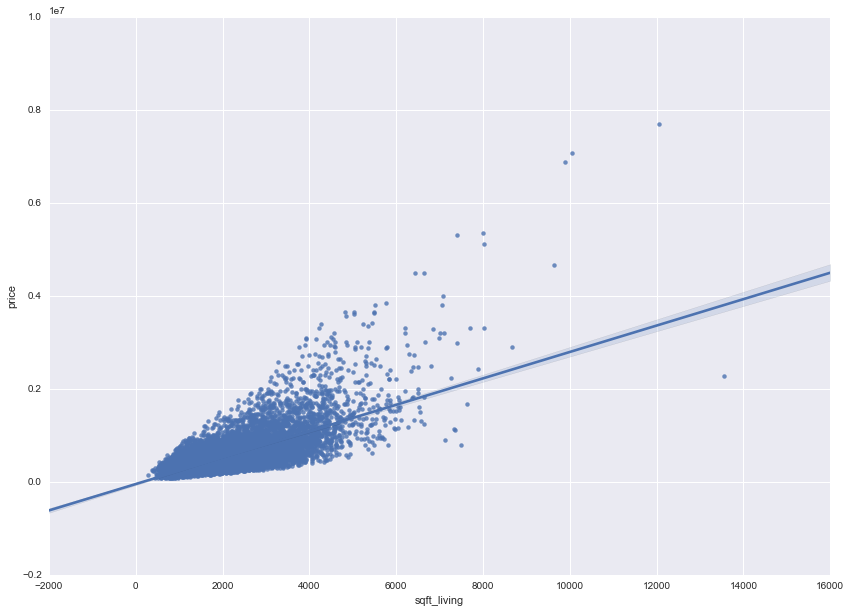

In [14]:
plt.figure(figsize=(14,10))
sns.regplot(x=train_data.sqft_living, y= train_data.price)

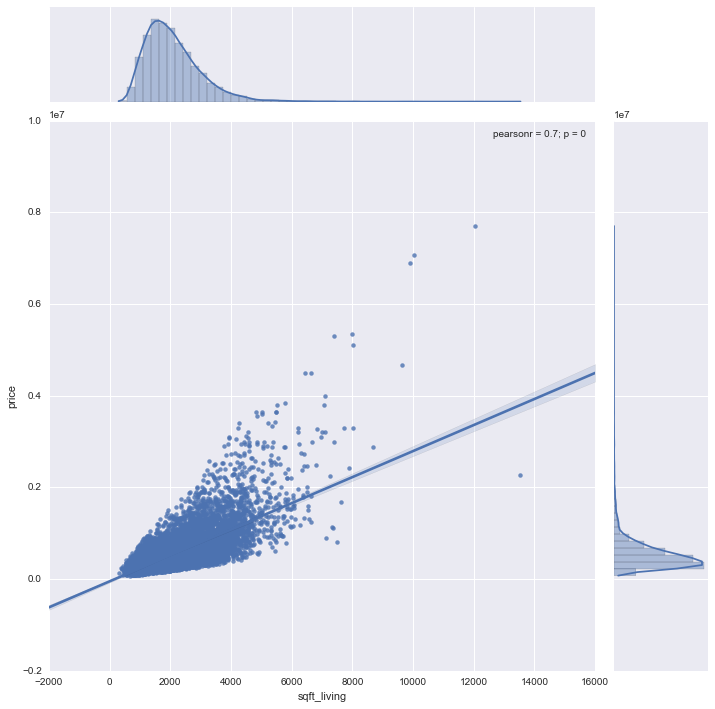

In [15]:
plt.figure(figsize=(14,10))
sns.jointplot(x=train_data.sqft_living, y= train_data.price, kind= "reg", size= 10)